In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import hist
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import category_encoders as ce 


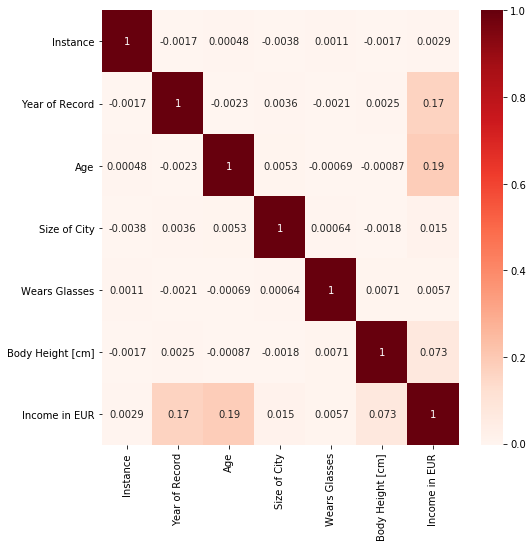

In [4]:
df_train = pd.read_csv('train.csv')
plt.figure(figsize=(8,8))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

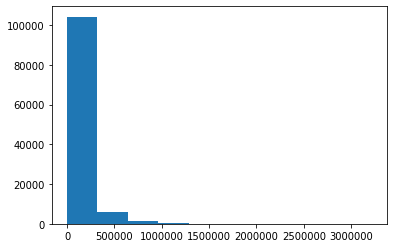

In [5]:
df_train = df_train[df_train['Income in EUR'] > 0]
df_train = df_train[df_train['Income in EUR'] < 5000000]
y = df_train['Income in EUR']

plt.hist(y)
plt.show()

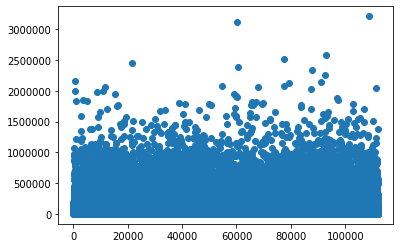

In [6]:
x = df_train['Instance']
plt.scatter(x,y)
plt.show()

In [7]:
df_test = pd.read_csv('test.csv')
print(len(df_test))
print(len(df_train))

73230
111826


In [8]:
def encoding_all(df_train, df_test):
    df = pd.concat([df_train, df_test])
    print(len(df))
    df_y = df['Income in EUR']
    df = df.drop('Income in EUR', axis =1 )
    df_instance = df['Instance']
    df= df.drop('Instance', axis=1)
    
    df['Gender'] = df_train['Gender'].replace('0',np.nan)
    df['University Degree'] = df_train['University Degree'].replace('0',np.nan)
    
    for col in df.columns:
        if df[col].dtype != object:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode())

    # scaling data 
    std = StandardScaler()
    df['Age'] = std.fit_transform(df['Age'].values.reshape(-1,1))
    df['Body Height [cm]'] = std.fit_transform(df['Body Height [cm]'].values.reshape(-1,1))
    df['Size of City'] = std.fit_transform(df['Size of City'].values.reshape(-1,1))
    df.drop('Hair Color',axis =1,inplace = True)
    df.drop('Wears Glasses',axis =1,inplace =True)
    
    #binary encoding
    be = ce.TargetEncoder(cols=['Gender','Country','Profession','University Degree'])
    df = be.fit_transform(df,df_y)
    
    #normalization 
    
    std = StandardScaler()
    df_values = df.values
    df_values = std.fit_transform(df_values)
    df.loc[:,:] = df_values
    
    df = pd.concat([df_instance,df],axis = 1)
    df_train = df[df['Instance'] <= 111993]
    df_test = df[df['Instance'] > 111993]
    df_train = df_train.drop('Instance',axis=1)
    df_test = df_test.drop('Instance', axis =1)
    
    print (df_train.head())
    print (df_test.head())
    return df_train, df_test


In [9]:
df_train, df_test = encoding_all(df_train, df_test)

185056
   Year of Record    Gender       Age   Country  Size of City  Profession  \
0       -0.212561  0.576459  0.231508 -0.646804      0.187899    1.475838   
1       -0.299143  0.552639  0.231508 -0.448808      0.356470    0.862957   
2        1.605670  0.552639 -0.582804 -0.185391      0.214831    0.276768   
3        0.566681  0.552639 -0.269607 -0.070018     -0.038375   -1.823934   
4        0.913010 -1.726434  0.544705 -0.564427     -0.342768   -0.743300   

   University Degree  Body Height [cm]  
0          -0.044275          0.894668  
1           0.911490          0.542875  
2           2.524701         -0.261222  
3          -1.031938         -0.210966  
4          -1.468271          0.643387  
   Year of Record    Gender       Age   Country  Size of City  Profession  \
0       -0.645473  0.576459 -1.021280 -0.583921     -0.205405    1.684709   
1       -1.164968  0.552639 -0.206967 -0.529919     -0.371392   -1.572725   
2       -0.472308  0.552639  0.983181 -0.399862     -

In [10]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.15)


In [11]:
regressor = CatBoostRegressor(iterations =1000, learning_rate=0.1,max_depth=8,random_state=75)
model = regressor.fit(X_train,y_train)
print (model.score(X_test,y_test))
y_pred = regressor.predict(X_test)
print (r2_score(y_test, y_pred))
print ('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))

0:	learn: 138398.3738955	total: 85.8ms	remaining: 1m 25s
1:	learn: 129052.3772587	total: 95.7ms	remaining: 47.8s
2:	learn: 120948.7977065	total: 104ms	remaining: 34.5s
3:	learn: 113472.4578147	total: 113ms	remaining: 28.1s
4:	learn: 106947.9599388	total: 121ms	remaining: 24.1s
5:	learn: 101289.2615009	total: 131ms	remaining: 21.7s
6:	learn: 96168.1251754	total: 141ms	remaining: 20s
7:	learn: 91891.3902080	total: 149ms	remaining: 18.5s
8:	learn: 87785.8039928	total: 159ms	remaining: 17.5s
9:	learn: 84228.2994707	total: 167ms	remaining: 16.5s
10:	learn: 81018.7063322	total: 176ms	remaining: 15.8s
11:	learn: 78168.6111541	total: 186ms	remaining: 15.3s
12:	learn: 75757.5592467	total: 196ms	remaining: 14.9s
13:	learn: 73506.0068786	total: 206ms	remaining: 14.5s
14:	learn: 71611.3467799	total: 222ms	remaining: 14.6s
15:	learn: 69936.5001463	total: 238ms	remaining: 14.6s
16:	learn: 68467.8589281	total: 253ms	remaining: 14.6s
17:	learn: 67125.3426312	total: 268ms	remaining: 14.6s
18:	learn: 65

165:	learn: 51169.5384351	total: 1.88s	remaining: 9.46s
166:	learn: 51154.9112847	total: 1.9s	remaining: 9.45s
167:	learn: 51138.1497751	total: 1.91s	remaining: 9.44s
168:	learn: 51082.0127106	total: 1.92s	remaining: 9.43s
169:	learn: 51058.4812696	total: 1.93s	remaining: 9.41s
170:	learn: 51042.5047417	total: 1.94s	remaining: 9.41s
171:	learn: 51023.7183495	total: 1.96s	remaining: 9.41s
172:	learn: 50988.9179585	total: 1.97s	remaining: 9.39s
173:	learn: 50969.7007200	total: 1.97s	remaining: 9.37s
174:	learn: 50948.9673227	total: 1.99s	remaining: 9.36s
175:	learn: 50939.4629007	total: 2s	remaining: 9.34s
176:	learn: 50916.4348256	total: 2s	remaining: 9.32s
177:	learn: 50891.2363125	total: 2.01s	remaining: 9.3s
178:	learn: 50882.3025425	total: 2.02s	remaining: 9.27s
179:	learn: 50858.6901233	total: 2.03s	remaining: 9.26s
180:	learn: 50845.3692624	total: 2.04s	remaining: 9.24s
181:	learn: 50832.7691316	total: 2.05s	remaining: 9.21s
182:	learn: 50819.4070461	total: 2.06s	remaining: 9.19s


323:	learn: 48418.9210917	total: 3.88s	remaining: 8.1s
324:	learn: 48400.1240184	total: 3.9s	remaining: 8.09s
325:	learn: 48381.9873166	total: 3.91s	remaining: 8.08s
326:	learn: 48367.3126378	total: 3.92s	remaining: 8.07s
327:	learn: 48348.8866033	total: 3.93s	remaining: 8.06s
328:	learn: 48329.8608402	total: 3.94s	remaining: 8.04s
329:	learn: 48316.6538269	total: 3.95s	remaining: 8.03s
330:	learn: 48298.9376477	total: 3.97s	remaining: 8.02s
331:	learn: 48280.2002569	total: 3.98s	remaining: 8s
332:	learn: 48268.4086609	total: 3.99s	remaining: 7.99s
333:	learn: 48259.4815246	total: 4s	remaining: 7.98s
334:	learn: 48243.5729973	total: 4.01s	remaining: 7.97s
335:	learn: 48231.4363974	total: 4.03s	remaining: 7.97s
336:	learn: 48221.8045663	total: 4.04s	remaining: 7.96s
337:	learn: 48200.9017690	total: 4.06s	remaining: 7.95s
338:	learn: 48179.1125049	total: 4.08s	remaining: 7.96s
339:	learn: 48163.2529651	total: 4.1s	remaining: 7.96s
340:	learn: 48145.6238962	total: 4.11s	remaining: 7.94s
3

473:	learn: 46524.0092540	total: 6.35s	remaining: 7.05s
474:	learn: 46517.8373587	total: 6.36s	remaining: 7.03s
475:	learn: 46507.2523129	total: 6.38s	remaining: 7.02s
476:	learn: 46496.7712347	total: 6.38s	remaining: 7s
477:	learn: 46490.1792195	total: 6.39s	remaining: 6.98s
478:	learn: 46474.3111331	total: 6.4s	remaining: 6.96s
479:	learn: 46466.3516192	total: 6.42s	remaining: 6.95s
480:	learn: 46450.5457785	total: 6.44s	remaining: 6.95s
481:	learn: 46441.5167657	total: 6.45s	remaining: 6.93s
482:	learn: 46435.9293407	total: 6.46s	remaining: 6.91s
483:	learn: 46426.7864369	total: 6.47s	remaining: 6.89s
484:	learn: 46418.1806210	total: 6.48s	remaining: 6.88s
485:	learn: 46412.1350865	total: 6.49s	remaining: 6.87s
486:	learn: 46401.6728295	total: 6.5s	remaining: 6.85s
487:	learn: 46395.7245737	total: 6.51s	remaining: 6.83s
488:	learn: 46386.2977793	total: 6.52s	remaining: 6.82s
489:	learn: 46377.5320154	total: 6.53s	remaining: 6.8s
490:	learn: 46367.7504563	total: 6.54s	remaining: 6.78

627:	learn: 44889.5820954	total: 8.18s	remaining: 4.85s
628:	learn: 44878.8271059	total: 8.19s	remaining: 4.83s
629:	learn: 44869.1042933	total: 8.2s	remaining: 4.82s
630:	learn: 44860.0079826	total: 8.21s	remaining: 4.8s
631:	learn: 44851.1621123	total: 8.22s	remaining: 4.78s
632:	learn: 44841.6357450	total: 8.23s	remaining: 4.77s
633:	learn: 44837.7532173	total: 8.23s	remaining: 4.75s
634:	learn: 44828.2858717	total: 8.25s	remaining: 4.74s
635:	learn: 44815.5045056	total: 8.26s	remaining: 4.72s
636:	learn: 44806.0448097	total: 8.26s	remaining: 4.71s
637:	learn: 44799.5038813	total: 8.27s	remaining: 4.69s
638:	learn: 44785.9474694	total: 8.29s	remaining: 4.68s
639:	learn: 44774.9331611	total: 8.3s	remaining: 4.67s
640:	learn: 44769.5563441	total: 8.31s	remaining: 4.66s
641:	learn: 44757.0648058	total: 8.32s	remaining: 4.64s
642:	learn: 44745.4476826	total: 8.34s	remaining: 4.63s
643:	learn: 44732.1785763	total: 8.36s	remaining: 4.62s
644:	learn: 44726.1369993	total: 8.37s	remaining: 4

792:	learn: 43463.4307642	total: 9.98s	remaining: 2.6s
793:	learn: 43455.8256583	total: 9.99s	remaining: 2.59s
794:	learn: 43452.7717161	total: 10s	remaining: 2.58s
795:	learn: 43446.5588748	total: 10s	remaining: 2.57s
796:	learn: 43433.7624551	total: 10s	remaining: 2.56s
797:	learn: 43417.3620055	total: 10s	remaining: 2.54s
798:	learn: 43408.3965697	total: 10.1s	remaining: 2.53s
799:	learn: 43398.7996065	total: 10.1s	remaining: 2.52s
800:	learn: 43389.0240036	total: 10.1s	remaining: 2.51s
801:	learn: 43380.9464689	total: 10.1s	remaining: 2.49s
802:	learn: 43370.6602110	total: 10.1s	remaining: 2.48s
803:	learn: 43365.0603422	total: 10.1s	remaining: 2.47s
804:	learn: 43356.5999778	total: 10.1s	remaining: 2.46s
805:	learn: 43353.9751101	total: 10.1s	remaining: 2.44s
806:	learn: 43345.8749007	total: 10.2s	remaining: 2.43s
807:	learn: 43340.5081801	total: 10.2s	remaining: 2.42s
808:	learn: 43333.1301871	total: 10.2s	remaining: 2.4s
809:	learn: 43322.1021078	total: 10.2s	remaining: 2.39s
81

945:	learn: 42264.2859854	total: 11.6s	remaining: 662ms
946:	learn: 42259.1044279	total: 11.6s	remaining: 650ms
947:	learn: 42253.9009018	total: 11.6s	remaining: 637ms
948:	learn: 42249.2211989	total: 11.6s	remaining: 625ms
949:	learn: 42243.6404539	total: 11.6s	remaining: 613ms
950:	learn: 42233.1800477	total: 11.6s	remaining: 600ms
951:	learn: 42226.0407937	total: 11.7s	remaining: 588ms
952:	learn: 42219.2316452	total: 11.7s	remaining: 575ms
953:	learn: 42212.8551718	total: 11.7s	remaining: 563ms
954:	learn: 42194.8064740	total: 11.7s	remaining: 551ms
955:	learn: 42187.7618766	total: 11.7s	remaining: 538ms
956:	learn: 42179.5789039	total: 11.7s	remaining: 526ms
957:	learn: 42174.7179883	total: 11.7s	remaining: 514ms
958:	learn: 42171.9606087	total: 11.7s	remaining: 501ms
959:	learn: 42163.5677156	total: 11.7s	remaining: 489ms
960:	learn: 42152.7679030	total: 11.8s	remaining: 477ms
961:	learn: 42142.1505492	total: 11.8s	remaining: 465ms
962:	learn: 42137.2460462	total: 11.8s	remaining

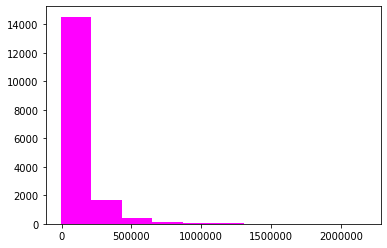

In [12]:
plt.hist(y_pred, color = 'magenta')
#plt.plot(y_pred, color = 'green')
plt.show()

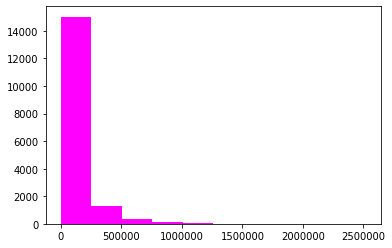

In [13]:
plt.hist(y_test, color = 'magenta')
#plt.plot(y_pred, color = 'green')
plt.show()

73230


(array([6.0625e+04, 8.9540e+03, 2.3070e+03, 7.7600e+02, 3.1000e+02,
        1.3200e+02, 6.1000e+01, 3.8000e+01, 1.7000e+01, 1.0000e+01]),
 array([  -8756.11479278,  171984.257639  ,  352724.63007078,
         533465.00250255,  714205.37493433,  894945.74736611,
        1075686.11979789, 1256426.49222966, 1437166.86466144,
        1617907.23709322, 1798647.60952499]),
 <a list of 10 Patch objects>)

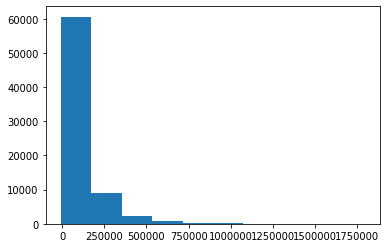

In [14]:
y_pred = regressor.predict(df_test)
print (len(y_pred))
plt.hist(y_pred)

In [15]:

res1 = []
res2 = []
counter = 111993
for num in y_pred:
    counter +=1
    res1.append(counter)
    res2.append(num)

df_res1 = pd.DataFrame(res1,columns=['Instance'])
df_res1['Income'] = res2
print (df_res1)
df_res1.to_csv('submission.csv',index=False)

       Instance         Income
0        111994   35560.362879
1        111995   13268.559258
2        111996   38347.665350
3        111997   96818.707934
4        111998   22450.799129
5        111999   91437.722849
6        112000  100761.311849
7        112001   50718.023609
8        112002   38363.682987
9        112003  101693.565038
10       112004   19257.439370
11       112005  169328.173832
12       112006   18726.223401
13       112007  107534.465806
14       112008  227836.594739
15       112009   74539.032873
16       112010   32296.177479
17       112011   26948.885425
18       112012   22048.582433
19       112013   11816.605127
20       112014  131861.926872
21       112015   49111.563471
22       112016   46640.439853
23       112017   31635.236743
24       112018  155326.225264
25       112019   57256.913700
26       112020   35327.401215
27       112021   28154.450786
28       112022  100381.455524
29       112023   65989.113998
...         ...            ...
73200   

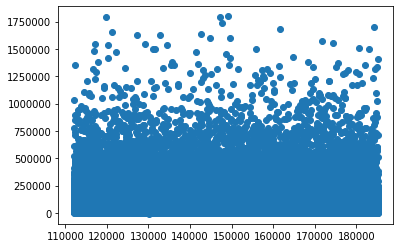

In [16]:
plt.scatter(df_res1['Instance'],df_res1['Income'])
plt.show()